# INTRO. Pandas에서 날짜 데이터 다루기(사전과제)

## datetime
- 날짜+시간을 저장하는 클래스
    - `.now()` - 현재 시간 반환
    - `.year`, `.month`, `.day`, `.hour`, `.minute`, `.second`, `.microsecond` - datetime 객체의 연, 월, 일 등 개별 요소만 추출 가능
    - `weekday()` - datetime 객체의 요일 반환 (0:월 ~ 6:일)
    - `.date()` - datetime 객체의 날짜 부분 반환
    - `.time()` - datetime 객체의 시간 부분 반환
    - `.srtftime()`, `.strptime()` - 문자열 ↔ datetime 변환

## 날짜 연산하기: datetime, timedelta
- datetime 객체끼리는 뺄셈이 가능하며 두 날짜 사이의 시간간격을 계산할 수 있음
- 계산 결과는 timedelta 객체로 반환되어 날짜 연산 등에 활용할 수 있음
    - datetime - datetime (가능)
    - datetime ± timedelta (가능)
    - datetime + datetime (불가능)

## diff()
- diff()를 사용하면 시계열 데이터의 현재 시점과 이전 시점 간의 차이를 계산하여 변화량을 구할 수 있음
    - `.diff()`는 바로 앞 시점과의 차이를 계산하여 데이터의 변화량을 보여줌 (=차분 -> 좀 이따 나옴!)
    - 추세를 제거하고 정상성을 확보하여 패턴을 단순화할 수 있음
    - `.diff()`로 구해진 결과에서 첫 번째 값은 비교대상이 없어 NaN값이 생기게 되며, 이에 대한 후처리가 필요


# 1. 시계열 데이터란?
## 1.1 시계열 데이터의 정의
### 시계열 데이터란?
- 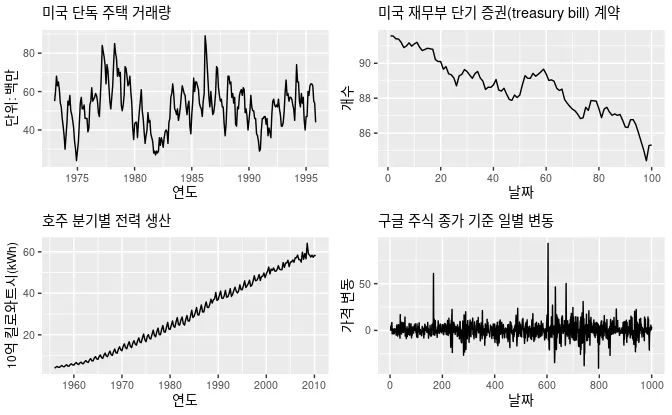
- 순차적인 시간의 흐름에 따라 수집된 데이터
- 연속한 관측치는 서로 상관관계가 존재하며, 순서가 중요한 "시퀀스 데이터"로 간주됨.
- 단순 시간-수치로 이루어진 데이터 뿐만 아니라, 단어의 순서가 중요한 NLP 데이터에도 동일한 개념이 적용될 수 있음 (다음 세션에 시계열 RNN, LSTM 내용이 나오니 참고!)
> 핵심 질문 : 과거 데이터가 미래에 어떤 영향을 미치는가?

### 종단면 데이터와 횡단면 데이터
- 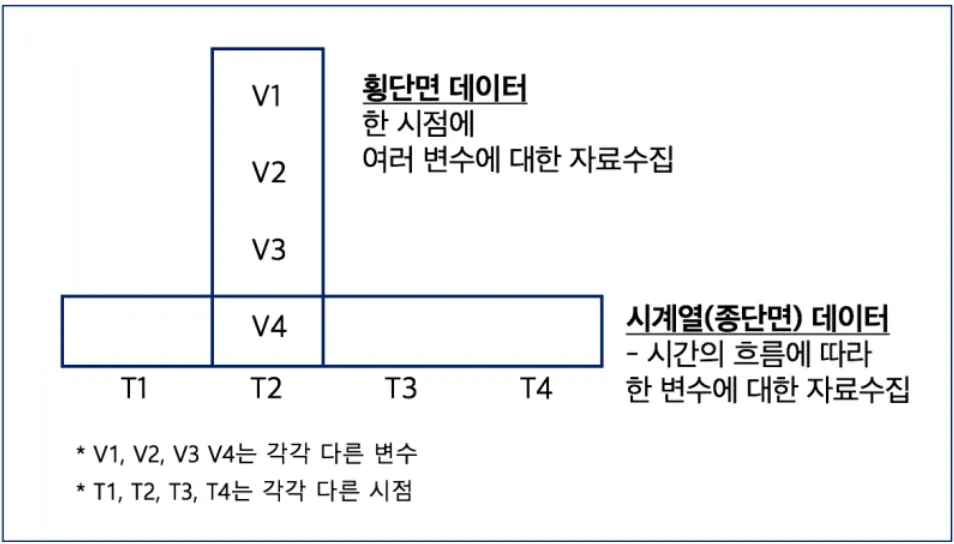
- 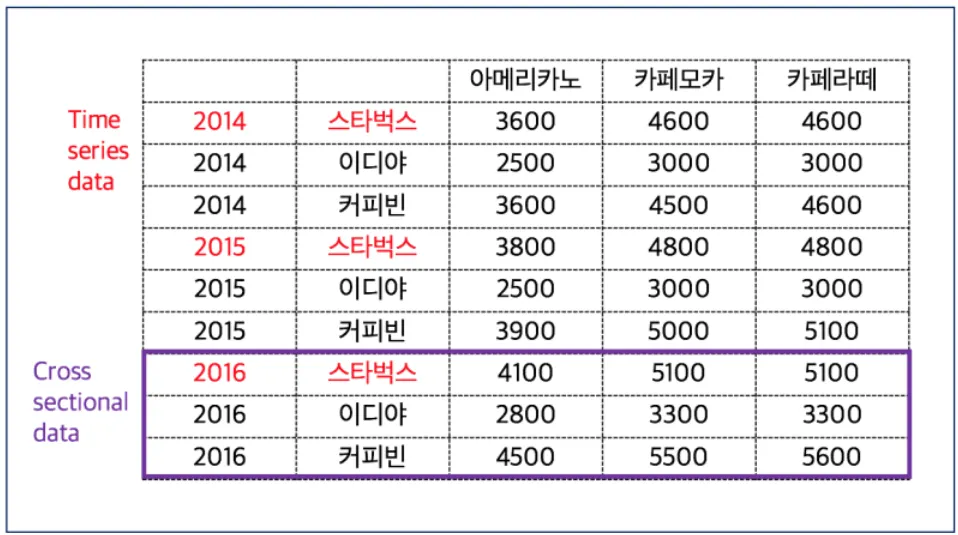
1. 종단면(시계열) 데이터 (Panel/Longitudinal Data)
- 동일한 개체에 대해 특정 시간 간격으로 수집된 데이터
- 종단면 데이터의 특징 : 시간 의존성 O, 개체 또는 단위 추적, 패턴 및 동향 분석, 효과 및 원인 분석
2. 횡단면(비시계열) 데이터 (Cross Sectional Data)
- 몇 가지 주제에 대해 특정 시점에서 수집된 데이터
- 횡단면 데이터의 특징: 시간 의존성 X, 다중 변수, 비교 분석, 상관관계 분석

### 단변량 시계열과 다변량 시계열
1. 단변량 시계열(Univariate Time Series):
- 시간에 따라 연속적으로 측정된 단일 변수로 이루어진 시계열 데이터
- 시간의 흐름에 따른 패턴과 트렌드 이해
- 적용 사례: 주식 가격, 온도 기록, 매출 데이터 등
2. 다변량 시계열(Multivariate Time Series)
- 같은 시간에 기록된 둘 이상의 변수로 이루어진 시계열 데이터
- 변수 간 상호 작용 및 영향력 파악
- 적용 사례: 경제 지표, 기후 모델


## 1.2 시계열 분석과 그 목적
- 시계열 분석
    - 시계열 분석의 주 목표는 미래 데이터 예측!
    - 시계열 분석은 시계열 데이터를 분석하고 모델링하는 통계적인 방법과 기법
    - 데이터 구조 파악, 예측, 이상치 탐지를 포괄하는 개념
    - 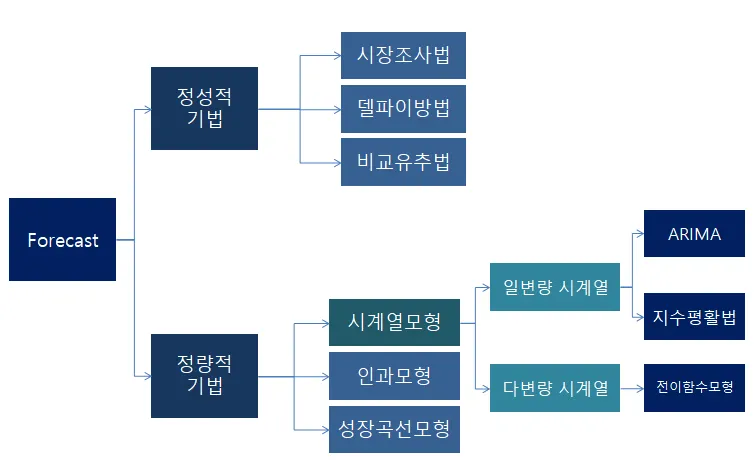


## 1.3 시계열 데이터의 특징
### 1. 시간의존성 (Temporal Dependence)
- 시계열 데이터는 시간에 따라 변화한다
    - 시계열 데이터는 시간 순서에 따라 관측되므로 데이터의 순서를 바꾸면 의미가 달라진다.
    - 과거의 값이 현재의 값에 영향을 미친다
    - 시점 간의 상관관계를 고려해야 한다
### 2. 계절성 (Seasonality) & 추세 (Trend)
- 시간에 따라 장기적으로 증가/감소하는 추세 + 일정 주기로 반복되는 패턴
    - 계절성: 일정 주기 (일, 주, 월, 년 등)에 따라 반복적으로 나타나는 데이터의 변동
        - 주기적인 패턴을 고려한 예측 모델링 가능
    - 추세: 시간의 흐름에 따라 나타나는 장기적인 증가/감소 경향
        - 전반적인 방향성 파악 O
### 3. 자기상관성 (Autocorrelation)
- 이전 시점의 값이 이후 시점의 값에 영향을 미친다
- 자기상관성: 말 그대로 '자기자신'끼리 '상과관계'를 갖는 특성
    - 한 시점의 값이 과거의 값과 통계적으로 관련 있는 성질
    - 즉, 시간이 지남에 따라 값들 간에 일정한 패턴이나 반복이 존재한다는 것
    - 관측값은 서로 독립적이지 않다
    - 횡단면 자료는 관측치 간 독립성 O, 시계열 자료는 자기상관성 O
- 자기상관성을 파악하면 과거의 데이터를 바탕으로 미래를 예측 가능!

#### **⚠️ ‘자기상관성’ 때문에 회귀분석이 불가능하다!**
1. 통계적 추론의 제약 및 오류
- 자기상관성이 존재하면 오차항 간의 상관관계가 있고, 회귀분석의 통계적 추론(검정, 신뢰구간 등)이 왜곡됨
- 예시 : 시계열 자료(대한민국 1인당 GDP와 유빈 키 발달 지표)
    - 공통된 추세 -> 허위 상관관계 -> 추세 제거후 분석해야 함.
    - 시계열 변수 간 회귀 분석시 반드시! 정상성 및 추세 확인이 필요함!
2. 예측의 어려움 & 모델 복잡성 증가
- 자기상관성은 예측 신뢰도를 낮춤 : 잔차가 시간에 따른 패턴을 가지고 미래값 예측 오차가 누적됨
- 더 복잡한 시계열 모델을 요구하게 만듦 : 계절성/추세 반영이 가능한 AR, ARIMA 등 시계열 모형 필요!

- 결국, 시계열 데이터는 시계열 전용 모델인 AR, MA, ARIMA를 사용하거나, 이런 구조를 반영한 사전 처리를 진행한 후 분석함.


## 1.4 시게열 데이터의 분석요인

### 1. 추세 요인 (Trend Factor)
- 데이터 전반에 걸쳐 시간에 따라 지속적으로 증가/감소하는 경향
- 시각적 표현: 꾸준히 증가하거나 감소하는 선형 그래프
- ex. 연도별 매출 상승, 출산률 감소 등

### 2. 계절 요인 (Seasonal Factor)
- 일정한 주기(계절, 월, 요일 등 정기적인 주기)로 반복되는 패턴
- 시각적 표현: 주기적인 변동을 나타내는 그래프
- ex. 크리스마스 시즌에 관련 용품 매출이 증가

### 3. 순환 요인 (Cycle Factor)
- 계절성보다 더 길고 불규칙한 주기로 반복되는 변동
- 시각적 표현: 길게 상승과 하강을 반복하는 파형 그래프
- ex. 경기 호황과 불황기
    - 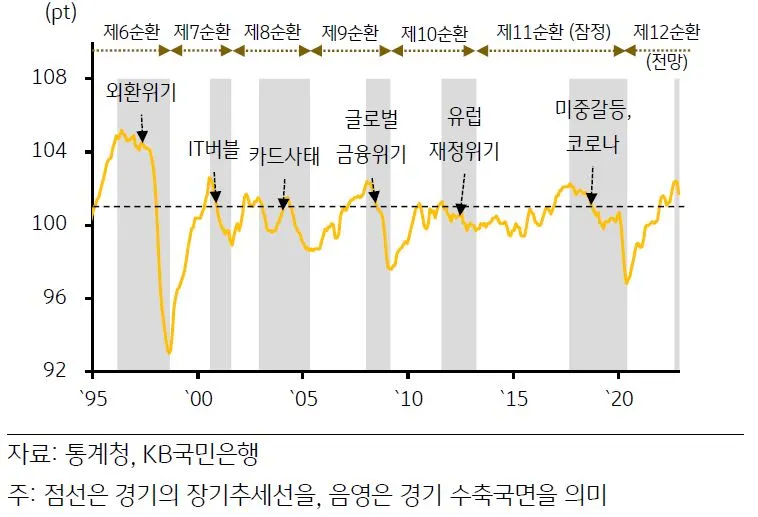

- 계절성과 순환성 구분 방법
    - 고정된 주기를 가지고 반복되는 패턴이 있을 경우 계절성
    - 주기가 불규칙하거나 장기적인 경우, 경제적 요인처럼 외부 요인에 의해 발생하는 경우 순환성
- 순환요인 주의점
    - 시계열 데이터가 순환 주기보다 크지 않다면 순환요인 판단 어려움 -> 따라서 순환요인을 무시하거나, 추세요인에 포함해 해석하기도 함!

### 4. 불규칙 요인 (Irregular Factor)
- 추세, 계절성, 순환성을 모두 제거한 뒤 남은 예측 불가능한 변동
- 노이즈, 우연적 사건, 일시적인 변동, 이상치 등을 모두 포함
- 시각적 표현: 불규칙한 변동을 나타내는 그래프
- ex. 자연재해, 팬데믹

### 추세성, 계절성, 순환성, 불규칙성 정리
- 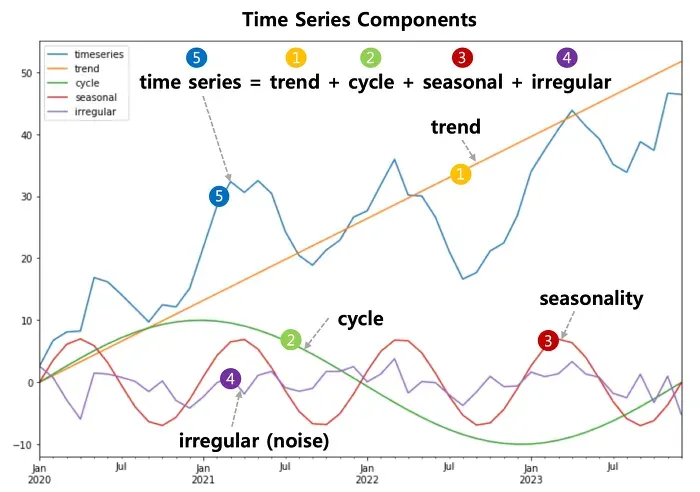
- 사이클(순환 요인)은 너무 넌센스인데?


## 1.5 시계열 분석의 Work Flow
1. 데이터 전처리 - 결측치 보간, 이상치 제거, 요소분해
2. 정상성 판단 (1차 시계열 세션에서는 여기까지 다룸)
3. 모델링 및 예측 


# 2. 시계열 데이터 전처리

## 2.1 이상치/결측치 처리

#### 시계열 데이터의 결측치
- 특정 시점(time point)에서 값이 측정되지 않았거나 누락된 상태
- 센서 오류, 수집 누락, 전송 지연 등으로 발생
- 결측치가 존재하면 추세와 계절성이 왜곡되므로 적절한 대치와 보간이 필요

#### 시계열 데이터의 이상치
- 값이 측정되었으나, 측정된 값이 일반적이지 않은 경우
- 측정 오류이거나, 실제로 특이한 이벤트일 수도 있는 극단적인 값
- 단순히 이상한 값이 아니라 신호의 중요한 의미일 가능성도 있으므로 신중한 접근 필요 → 신호에 대한 사전 지식 필요

#### 시계열 데이터 전처리의 필요성
- 시계열 데이터의 특성(시간 의존성/추세&계절성/자기상관성)이 존재! 이러한 특성이 왜곡되지 않도록 시계열 특성을 반영한 전처리가 필요

#### 전처리 프로세스
1. 데이터 확인/시각화
2. 결측치 확인 → 결측치 처리(삭제/단순 대치/보간/이동평균 대치 등)
3. 이상치 탐지 → 이상치 처리(삭제/단순 대치/보간/이동평균 대치 등)
4. 요소 분해

### 2.1.1 결측값 처리
- 삭제/단순 대치/보간/머신러닝 기법 등 다양한 방법 존재
- 보간법
    - 주어진 데이터 포인트의 값을 사용하여 두 개 이상의 데이터 포인트 사이에서 누락된 값을 추정하는 수학적 기법
    - → 사라진 값(결측값)을 합리적으로 메워주는 과정
    - 결측치/이상치 구간이 짧거나 신호의 패턴이 단순한 경우에 보간 정확도 높음
    - 종류
        - 선형 보간법
        - 다항식 보간법
        - 스플라인 보간법
        - 조각별 상수 보간법(이전 값 or 다음 값 유지, 가장 가까운 값 유지)
- 보간법 vs 회귀
    - 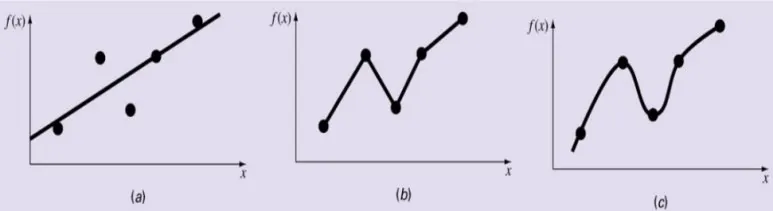
    - a는 회귀, b와 c는 보간!

|  | 회귀 | 보간법 |
| --- | --- | --- |
| 공통점 | 관측값 바탕으로 관측되지 않은 값에 대한 함수값 유추 |  |
| 차이점  | 관측된 점들의 오차를 가장 적게 만드는 선을 찾는 것 (오차 허용) | 관측값 완전히 신뢰, 관측값 직접 연결 |

### 2.1.2 이상치 탐지 및 처리
#### 이상치 탐지 방법 (전처리)
1. IQR 기반 이상치 탐지
- 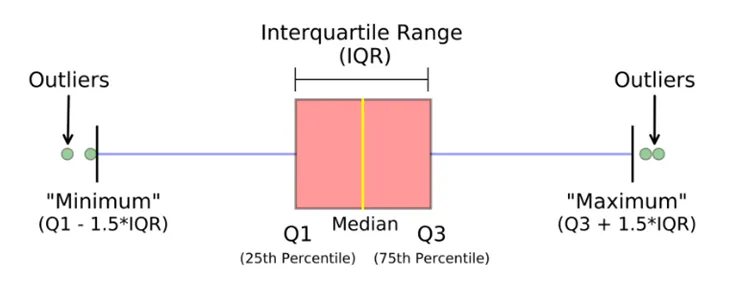
- 이 조건을 만족하면 이상치로 간주
- 시계열 적용 방법
    - 주기성이 없거나 비교적 안정적인 구간의 값들에서 이상치를 탐지할 때 사용
    - 구간별(예: 하루 단위)로 나눠서 IQR 계산 시, 추세의 영향을 줄일 수 있음
2. Z-score
- $Z=(x−μ)/σ$
- 특정 값이 평균으로부터 몇 표준편차 만큼 떨어져 있는지 나타냄
- Z-score가 특정 임계값을 넘어서면 이상치로 판단 (보통 |Z| ≥ 3)
- 시계열 적용 방법
    - 계절성/추세가 약하거나 값의 변동폭이 일정한 시계열에서 효과적
    - 구간별(예: 하루 단위)로 나눠서 계산 시, 추세의 영향을 줄일 수 있음
3. STL 분해
- 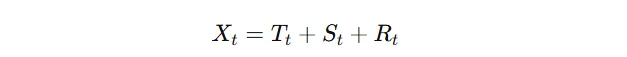
- 시계열을 세 부분으로 분해. Tt: 추세(trend), St: 계절성(Seasonal), Rt: 잔차(Residual)
- 시계열 적용 방법
    - 잔차가 특정 임계값을 초과하면 이상이 탐지
    - 계절성이나 추세가 뚜렷한 시계열(예:일별 매출, 센서 데이터)에 적합
    - 잔차에 대해 z-score, IQR 등 통계적 기준을 추가 적용하여 이상 탐지 가능
    - LOESS 회귀 기반 : 전체 데이터에 하나의 직선/곡선을 맞추는 대신 각 지점 주변의 데이터만 이용해 작은 회귀모델을 만들고 그 결과를 이어 붙여 부드러운 곡선을 만드는 방법(계산량 많음)
    

#### 이상치 탐지 모델
1. 분류 및 회귀 트리 (CART)
- 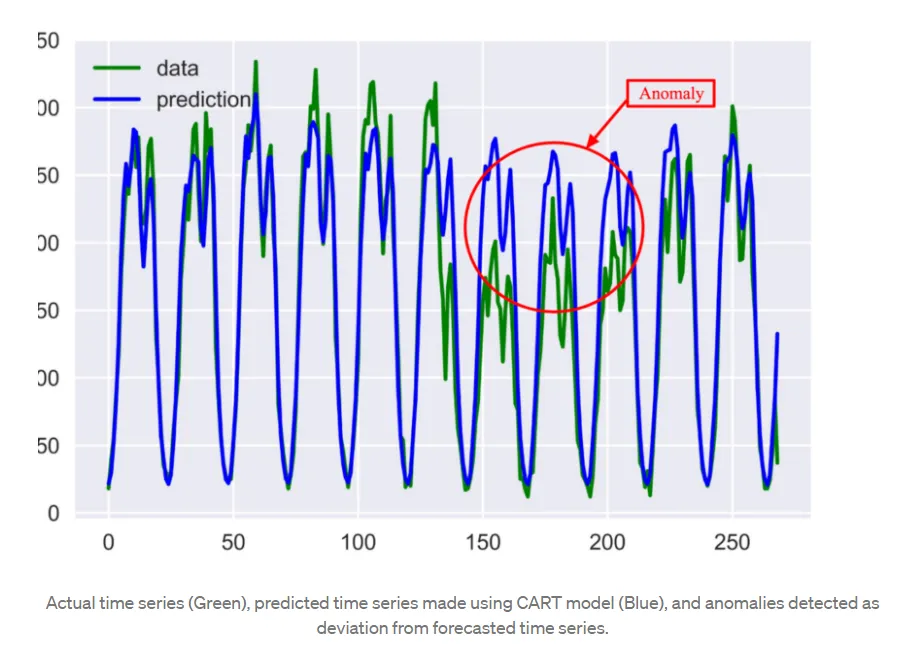
- 원리
    - CART 모델은 데이터를 분할하여 예측값을 산출함
    - 예측 오차(residual)가 일정 임계값 이상인 지점을 이상치로 간주함
    - 회귀트리를 이용할 경우, 예측한 값과 실제 값의 차이가 클수록 이상으로 탐지
- 시계열 적용 방법
    - 과거 구간의 값을 입력으로 하여 다음 시점의 값을 예측하고, 예측오차 기반으로 이상을 판단함.
2. 클러스터링 기반 이상 탐지
- 원리
    - 정상 구간의 데이터들은 특정 클러스터에 잘 모임
    - 이상치는 대부분 클러스터 중심에서 멀리 떨어진 outlier cluster나 소수 클러스터로 나타남
    - K-means, DBSCAN, Isolation Forest 등이 주로 사용됨
- 시계열 적용 방법
    - 시계열의 특징(feature)을 추출한 후, 각 시점(또는 구간)을 벡터로 표현해 클러스터링 수행
        - 예: [최근 5분 평균, 표준편차, 기울기] 등의 특징
    - 중심으로부터 거리나 군집 밀도를 기준으로 이상치 판단
- 단점: 시계열의 순서 정보는 직접적으로 반영되지 않음
3. 오토 인코더
- 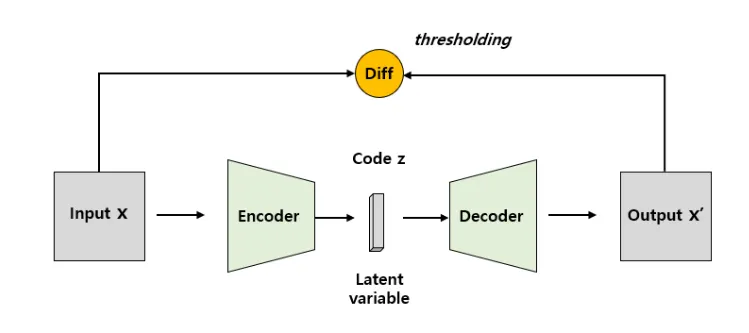
- 원리
    - 인공신경망 기반 비지도 학습 모델
    - 정상 데이터에 대한 특징을 학습하고, 학습된 모델에 데이터를 입력했을 때 재구성한 결과와 학습된 정상 특징과의 차이점을 비교하여 이상 여부 판단
    - 입력을 잠재공간(latent space)에 압축했다가 복원함
    - 정상 패턴은 잘 복원되지만, 이상 패턴은 복원오차가 커짐
    - 복원오차가 일정 임계값 이상이면 이상치로 판정
- 시계열 적용 방법
    - LSTM Autoencoder를 사용하면 시계열의 시간적 의존성까지 학습 가능
    - sliding window로 시계열 구간을 학습시키고, 테스트 구간의 복원오차로 이상 탐지
- 장점: 다변량 시계열 이상 탐지에 특히 강력

#### 이상치 처리 방법
- 이상치를 결측치로 간주 -> 결측치와 같은 방법으로 처리
    - 삭제, 단순 대치, 보간

#### 평활화(smoothing)
- 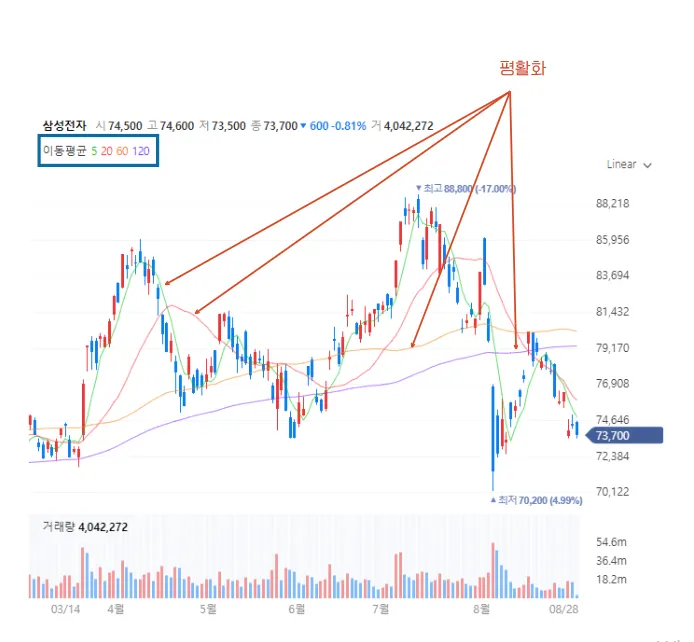
- 평활화는 시계열 데이터에서 노이즈를 줄이고, 전체적인 흐름이나 추세를 더 명확하게 파악하기 위해 데이터를 부드럽게 만드는 기술
> **이동평균(Moving Average, MA)**
- 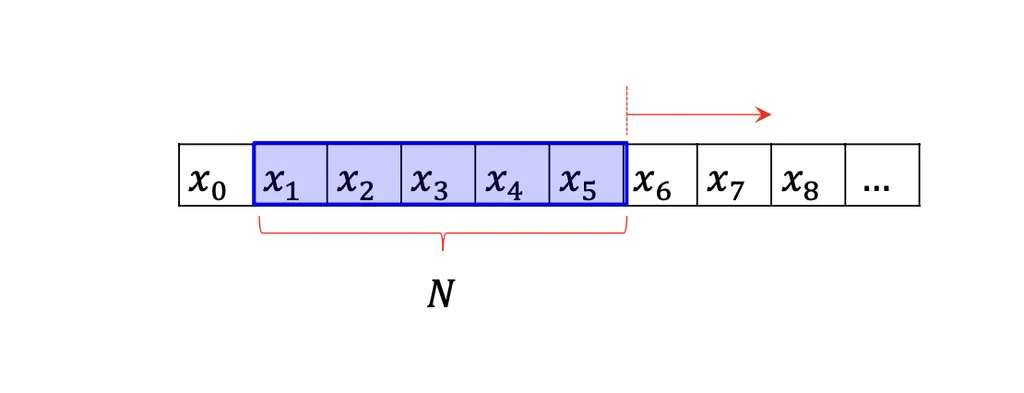
- N 클수록 긴 기간의 데이터를 평균에 포함 -> 노이즈가 더 많이 제거되어 보다 매끄러운 곡선 생성 (N = Moving Window의 길이)
- 시계열의 부분집합으로 평균을 구하여 평활화 효과를 얻는 방법
- 윈도우(평균을 구할 구간의 크기) 내의 평균을 구하는 방법
- 사용 목적
    - 노이즈 제거: 일시적인 급등/급락을 평탄화
    - 추세 파악: 상승/하강 흐름을 쉽게 식별
    - 예측의 기초자료: 시계열 예측(ARIMA 등)의 기반이 되기도 함
- 이동평균의 유형

| 종류 | 설명 | 사용 |
| --- | --- | --- |
| 단순 이동평균 (SMA) | 단순히 기간 내 모든 값 평균 | 변동이 심하지 않고 비교적 안정적인 시계열 |
| 가중 이동평균(WMA) | 최근 값에 더 큰 가중치 부여 | 최근 데이터가 더 중요한 상황 |
| 지수 이동평균(EMA) | 최근 데이터에 지수적으로 더 많은 가중치 부여  | 최근 값에 매우 빠르게 반응해야 하는 시계열   ex) 주식 |

- 이동평균을 이용해 그 값으로 결측치(이상치)를 대치하는 식으로 사용하기도 함

## 2.2 요소분해 (Decomposition, 시계열 분해)
### 요소분해
- 주어진 시계열 데이터를 개별 성분(추세성, 계절성, 순환성, 불규칙성)으로 분해하는 과정
- 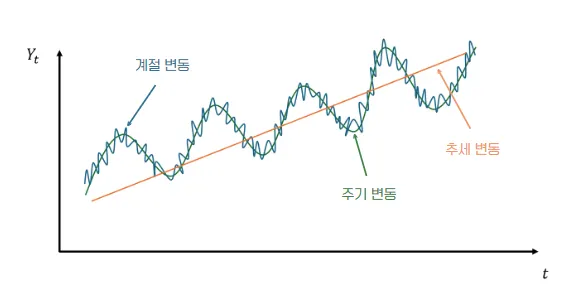

- 💡 $Y_t$ = $f$( $T_t, S_t, C_t, R_t$)

    - $T_t$ : 추세성분 (시점 t에서의 추세요소)
    - $S_t$ : 계절성분 (시점 t에서의 계절요소)
    - $C_t$ : 순환성분 (시점 t에서의 순환요소)
    - $R_t$ : 불규칙성분 (시점 t에서의 불규칙요소)

    → 일반적으로 순환성은 장기간에서만 고려되므로 $C_t$ = 0 으로 설정함

- 요소 분해를 하는 이유
    - 시계열 데이터 = 추세/계절성/순환성/불규칙성 등 다양한 변동이 결합된 형태
    - 각 요소를 분리하면 각각의 패턴을 명확히 이해 가능
    - 이후 예측, 이상 탐지 등 분석 작업을 정교하게 수행할 수 있음

### 가법모형 (Additive Model)
$$
y_t = T_t + S_t + R_t
$$
- 시계열 = 추세 + 계절성 + 불규칙성
- 시계열 관측값은 변동요인들의 가법(+)으로 설명될 수 있다 가정
- 각 변동 요인들이 독립적으로 더해지며, 모든 요소의 영향이 일정함
- 시계열 전체에서 계절성의 진폭이 일정할 때 적합하다.

### 승법모형 (Multiplicative Model)
$$
y_t = T_t * S_t * R_t
$$

$$
log(y_t) = log(T_t) + log(S_t) +log(R_t)
$$
* 로그 변환을 통해 가법 형태로 만들 수 있다

- 시계열 = 추세 x 계절성 x 불규칙성
- 시계열 관측값은 변동요인들의 승법(*)으로 설명될 수 있다 가정
- 추세가 커질수록 계절성이나 불규칙성의 효과도 비례해서 커짐
- 진폭이 시간에 따라 달라질 때 적합

ex. 가법 모형 - 여름철 한국에 바운하는 관광객은 매년 평균 10만명씩 증가한다  
ex. 승법 모형 - 여름철 한국에 방문하는 관광객은 매년 평균 10%씩 증가한다  

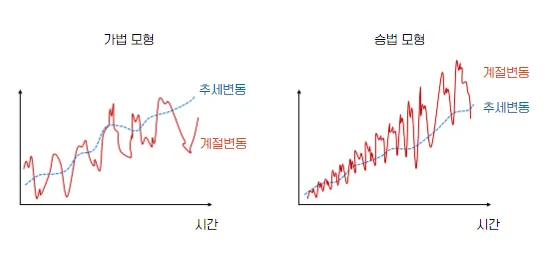
- 가법모형 : 추세변동과 계절변동이 서로 독립적, 시간이 지남에 따라 변동폭 일정
- 승법모형 : 추세변동에 따라 계절변동이 변함, 시간이 지남에 따라 변동폭 증가/감소

### 요소분해 정리
- 시계열 데이터에 포함된 다양한 변동 요인을 분리해 원본 데이터를 명확히 파악
- 복잡한 시계열 그래프를 요소별로 나눠 각 요소를 독립적으로 분석할 수 있음
- 예측 모델링 전에 요소를 분리해두면 각 구성 요소를 개별적으로 모델링하거나 통제할 수도 있어 정확도 향상 가능 (시계열 예측 모델에 적용)
- 특정 시점에 급격한 변화가 있다면 어느 요소에서 비롯된 것인지 분석할 수 있어 이상 탐지 및 원인 분석 가능

# 3. 정상성 판단
## (1) 정상성이란?

💡**정상성의 핵심**  
    : **'시간에 상관없이' 일정한 성질을 띠고 있다!**

-정상성: 시계열 데이터가 평균, 분산 등의 통계적 특성이 시간에 따라 일정한 수준으로 유지되는 것
- 한 마디로, "어제나 오늘이나 데이터의 통계적 특성이 일정하다"
- 한자정의: 일정하여 늘 한결같은 성질 -> 정상성을 가진 시계열은 과거와 현재와 미래 모두 항상 안정적인, 일정한 분포를 가진 것이 특징

- 정상성을 띠는 시계열 데이터: 정상 시계열(Stationary Time Series)
- 정상성을 띠지 않는 시계열 데이터: 비정상 시계열(Non-stationary Time Series)

> 예시(진격의 거인 캐릭터)
- x축이 에피소드(회차), y축이 캐릭터의 감정 정도 라고 했을때,

1. 정상 시계열: 리바이 아커만
- 감정의 폭이 크게 없는 캐릭터
- 감정의 평균도 일정, 감정의 변동폭(분산)도 일정
- 추세가 없는 정상 시계열

2. 비정상 시계열: 에렌 예거
- 감정의 변화 정도가 큰 캐릭터
- 감정의 평균이 시간에 따라 변하고 (상승 추세), 분산도 점점 커짐
- 감정선이 한 방향으로 치우치며 커지는 비정상 시계열

→ 정상 시계열은 예측 및 모델링에 적합하며 일반적으로 대부분의 통계 기법에 적용 가능합니다.

## (2) 강한 정상성과 약한 정상성
### 강한 정상성(Strong Stationarity)
- 강정상성을 띠는 시계열은 모든 적률(평균, 분산, 왜도, 첨도)이 시간과 무관하게 일정함
- “이 시계열을 언제 관찰하든 전체 확률적인 패턴이 똑같다”
- 기저를 이루는 확률 분포(Underlying distribution) 자체가 언제나 같아야 한다는 것
- 예시: 주사위를 매초 한 번씩 던질 때, 결과값 시계열 $X_t$.

→ 현실에서 찾아보기 매우 어려움!
    - why? 
    - 실제 시계열 데이터는 잡음(noise)과 외부 요인의 영향으로 불안정하고 다양한 원인이 영향을 주기 때문에 처음부터 끝까지 완전히 동일한 확률분포를 유지하는 경우는 드물다!

### 약한 정상성(Weak Stationarity, 통상적으로 시계열 분석에서 '정상성'이라고 부르는 것)
- 강한 정상성보다 완화된 개념으로, 아래 세 가지 조건을 **모두** 만족하면 약한 정상성을 가진다고 말함
- 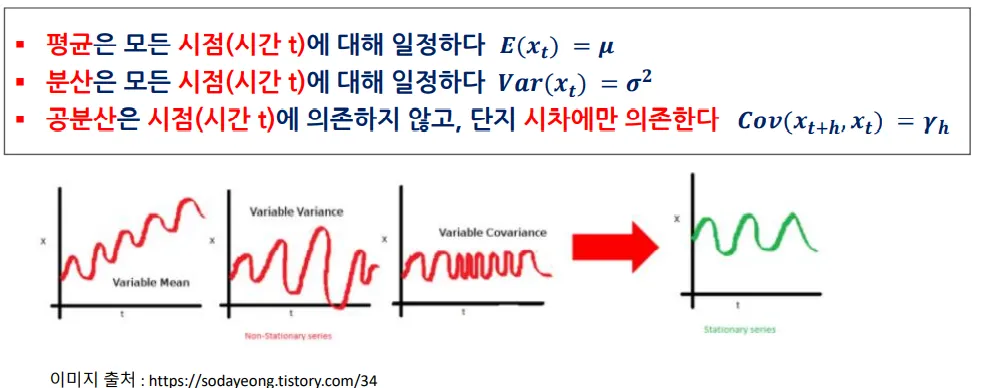
- 약한 정상성은 전체 확률 분포(꼬리, 왜도, 첨도)는 변할 수 있으나 평균, 분산, 자기공분산은 변하지 않습니다. 즉 2차 적률까지만 일정합니다.
- 즉, 어느 시점에 t를 뽑아도, 두 시점간의 공분산(자기공분산)은 그 시간적 차이에만 의존함

- 자기공분산 (Autocovariance): 한 시계열의 다른 시점들 사이의 관계
    - 이름 그대로 자기 자신과의 공분산
    - 동일한 시계열 $X_t$의 서로다른 시점 $t$와 $t-k$ 사이의 관계를 보는 것
    - $\gamma(k) = \operatorname{Cov}(X_t, X_{t-k})$
    - 자기공분산 값이 양수면 두 시점 과거와 현재가 같은 방향으로 움직이고, 음수면 반대 방향으로 움직임

👉🏻 '약 정상성'을 띠는 시계열 데이터는 시간이 흘러도 평균, 분산이 변하지 않으며 자기공분산이 시차에만 의존한다!

## (3) 시각적으로 정상성 파악하기
- 예제를 통해서 정상성을 파악해보자!
- 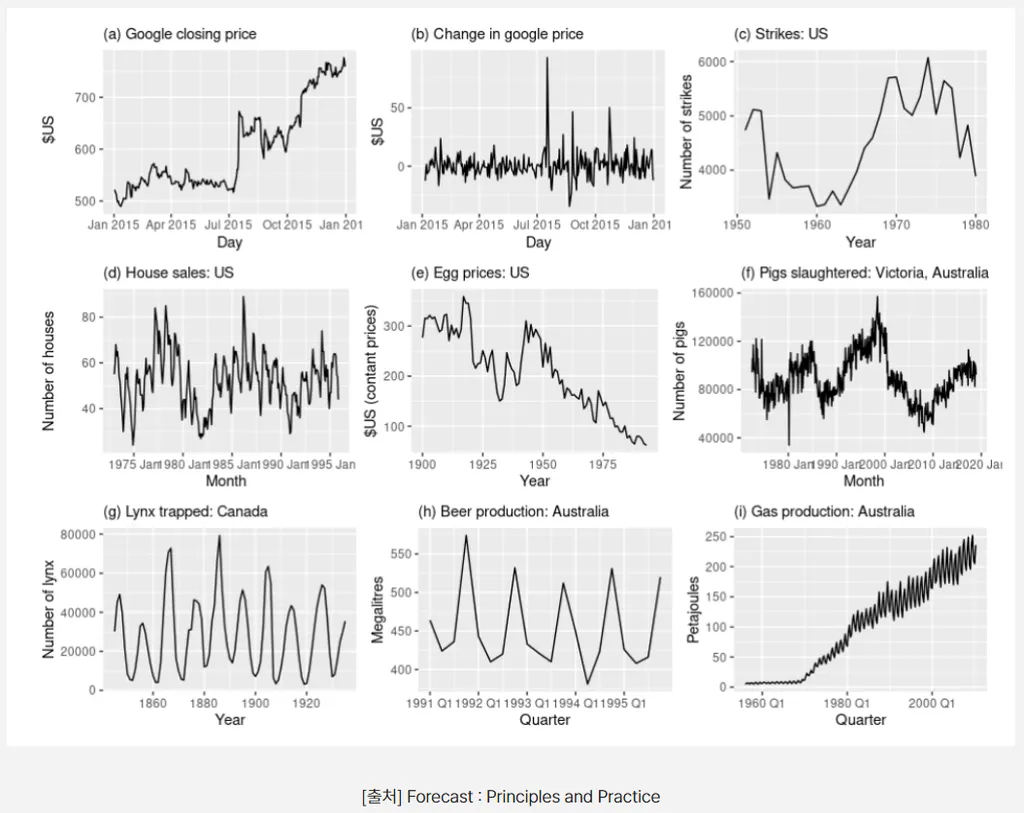
- 추세가 있는 시계열: a, c, e, f, i
- 계절성이 있는 시계열: d, h, i
- 남은 시계열: b, g
- (b)를 더 자세하게 살펴보기
    - (a): 구글 주식의 가격 수준 -> 추세가 뚜렷하게 존재 -> 비정상 시계열
    - (b): 주식 가격의 일일 변동량
$$
\Delta y_t = y_t - y_{t-1}
$$
- → b는 a를 1차 차분(differencing)한 결과로 해석할 수 있다!
- 차분하면 어떤 효과?
    - 추세를 제거하고 평균 주변에서 진동하는 시계열로 만들었음
    - (b)는 정상성에 더 가까운 시계열로 보임
        - 평균 일정, 분산 상대적으로 일정
- 정상적이라고 할 수 있는 시계열:
    - 구글 주식 가격의 일일변동(b), 연간 포획된 스라소니의 전체 수(g)
- (g)는 등락에 있어 고정된 기간이 존재하지 않으므로 계절성이 있다고 할 수 없음(아마 그래프의 x축의 기간이 매우 길어서 약간의 차이도 몇 년 차이이고, 따라서 등락에 고정된 기간이 없는 듯!)

## (4) 검정을 통해 정상성 판단하기
- 대부분의 정상성 검정은 단위근(Unit-root) 검정 입니다!
### 단위근이란?
- '단위근'이란 이름은 '단위(1)' + '근(방정식의 해)'을 합친 말
- 시계열 모델의 특성방정식에서 근이 1인 경우, 해당 시계열은 단위근을 가짐
- -> 이는 비정상 시계열을 의미함
    - 단위근 없음 -> 충격을 받아도 시간이 지나면 원래대로 돌아옴, 평균 주변에서 맴돎
    - 단위근 있음 -> 충격을 받으면 그 상태 유지, 과거 충격이 누적됨
    - 단위근 = "충격이 영구적으로 남는다" -> 예측이 어려워진다!

- 단위근이라고 부르는 이유(수학적 배경)
    - 시계열 식: 
    ```
    오늘 값 = α × 어제 값 + 랜덤 충격
    ```

| α 값 | 의미 | 상태 |
| --- | --- | --- |
| α < 1 | 과거 영향이 점점 약해짐 | ✅ 정상 |
| **α = 1** | 과거 영향이 **그대로 유지** | ❌ **단위근!** |
| α > 1 | 과거 영향이 점점 강해짐 | ❌ 폭발적 |

**α = 1**일 때를 '단위근을 갖는다'고 한다!

### 단위근이 있으면 생기는 문제
    - 랜덤워크로 인해 예측의 불확실성이 생김!
1. 평균이 일정하지 않아서 예측이 어려움
- 단위근이 있으면 시계열이 랜덤워크(이전 값에서 매번 랜덤하게 움직임)처럼 움직여서 평균으로 돌아오지 않음
2. 분산이 계속 커짐
- 단위근이 있으면 시계열의 분산이 시간에 따라 증가함. 시간이 지나면 변동폭이 계속 커져서 불확실성이 커지므로 신뢰 있는 예측이 불가능함
3. 과거 충격이 영원히 남음
- 랜덤워크처럼, 과거 충격이 누적되어 시계열 전체에 영향을 줌. 예를 들어, 어제 랜덤 충격으로 갑자기 가격이 올랐을 뿐인데 앞으로도 그 영향이 계속 이어짐. 따라서 과거 데이터를 이용한 통계적 추정이 왜곡될 수 있음

- 이와 같은 이유로, 단위근이 있는 시계열은 비정상 시계열임!

### 시계열 모델을 통해 단위근으로 정상/비정상 시계열 판단 과정 알아보기
- #2 AR(1) 모델(다음 차시에 등장)을 통해 본 단위근
$$
y_t = \alpha y_{t-1} + e_{t}
$$
> $\alpha$***=0일때 (완전한 백색잡음)***
- 완전한 정상성을 가짐
> $|\alpha|$***<1일때 (정상 시계열)***
- 결국 시계열은 평균 수준으로 돌아오므로 정상 시계열로 간주
> $\alpha$***=1일때 (비정상 시계열), 단위근이 있음***
- 랜덤워크, 대표적인 비정상 시계열 (ex. 효율적 시장 가설에 따른 주가)

- 그렇다고 관측값 앞의 계수가 1인지만 보면 정상/비정상 시계열을 구분할 수 있다? -> 그것은 아님! 다른 시계열 모델에서도 '계수=단위근' 이라고 할 수는 없기 때문!
- 판단을 위해 검정 방법을 알아야 함!

### 단위근 검정의 대표 방법
1. ADF(Augmented Dicky-Fuller) 검정
- 단위근(Unit root) 존재 여부를 통해 시계열의 정상성 판단
- "단위근의 존재를 의심하자"
- 귀무가설: 시계열에 단위근이 존재한다 -> 비정상 시계열
- 대립가설: 시계열에 단위근이 존재하지 않는다 -> 정상 시계열
> p-value가 유의수준보다 작으면 귀무가설 기각 -> 정상 시계열

2. KPSS(Kwiatkowski-Phillips-Schmidt-Shin) 검정
- 역시 단위근 기반의 검정이지만, 귀무가설이 반대
- "정상성을 의심하자"
- 귀무가설: 시계열에 단위근이 존재하지 않는다 -> 정상 시계열
- 대립가설: 시계열에 단위근이 존재한다 -> 비정상 시계열
> p-value가 유의수준보다 작으면 귀무가설 기각 -> 비정상 시계열

✅KPSS vs ADF: 두 검정의 결과가 다른 경우는?
- 확정적 추세가 존재하는 경우, KPSS와 ADF 검정의 결론이 다를 수 있음
- 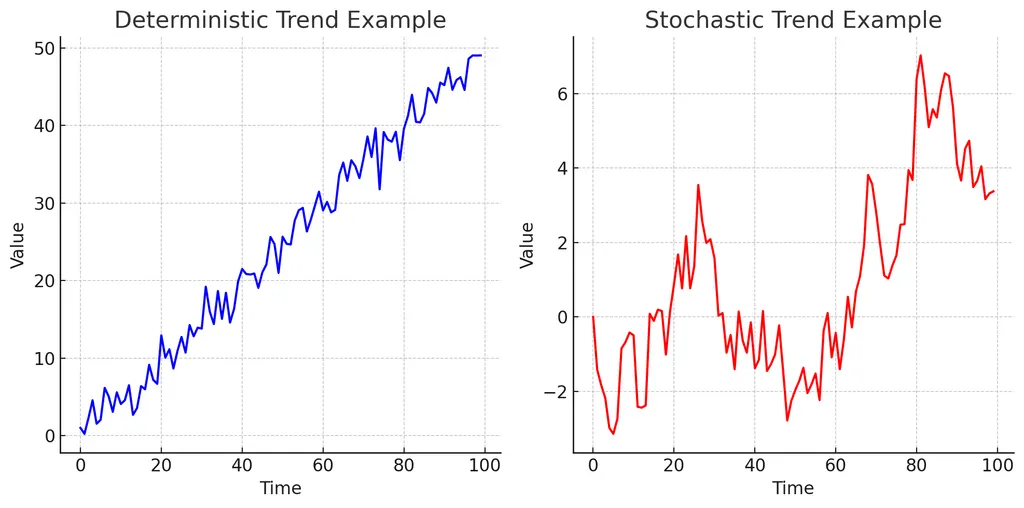
- 왼쪽이 확정적 추세, 오른쪽이 확률적 추세
- KPSS와 ADF 검정의 결론이 다르다면, 시계열 데이터가 확정적 추세가 있을 수 있고, 이때 ADF가 추세를 랜덤워크로 착각해서 '비정상'이라고 잘못 판단한 것이다!
- 그러므로 추세항을 추가하면 ADF도 확정적 추세가 있어도 정상이라고 판별할 수 있음. 단, ADF는 기본적으로 검정력이 약해서 추세랑 랜덤워크 구분을 잘 못함.

## 3.3 정상성을 확보하기 위한 여러가지 방법들
### (1) 어떻게 시계열을 정상적으로 만들 수 있을까?
> 우리가 마주하는 많은 시계열 데이터들은 정상적이지 않은데 반해 대부분의 통계적 시계열 모델들은 정상 시계열을 대상으로 한 모델들이다. 정상적이지 못한 데이터들을 어떻게 설명한담?
- 비정상 시계열: 대부분 추세가 있거나, 계절성이 있거나, 분산에 변동이 존재
    - -> 추세를 제거하거나(detrending), 계절성을 제거하거나(deseasoning), 분산을 일정하게 만들자! (미리 EDA를 찍어보고 추세를 띄는 데이터는 추세 제거, 계절성을 띄는 데이터는 계절성 제거 방향으로)
- -> 시계열은 정상성을 띠게 된다!

#### 1. 추세 제거
: 시계열이 지속적으로 증가하거나 감소할 때 적용
- **차분**
    - 연이은 관측값들의 차이를 계산하는 것
    - 평균의 정상성을 확보하기 위한 방법
- 시계열 데이터에서 한 시점의 값과 그 이전 시점의 값을 차분하여 변화량을 계산
- -> 이를 통해 시계열 데이터의 정상성을 확보하거나 비정상적인 변동을 제거할 수 있음!
- 이유: 대부분의 비정상적 시계열은 값이 누적되는 누적과정(Integrated Process)이기 때문에 누적된 값을 빼줌으로써 정상적 시계열을 얻어낼 수 있음
- 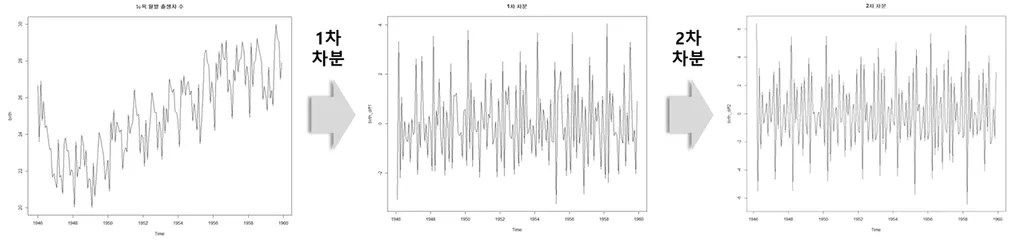
- 차분의 종류
    1. 1차 차분
    - t시점의 y값에서 t-1시점의 y값을 빼는 것
    - 추세를 제거하기 위한 방법
    2. 2차 차분
    - 1차 차분으로도 정상성이 없으면 2차 차분을 함
    3. 역차분
    - 분석 후에 해석을 위해 차분된 데이터에 이전 시점 값을 더해서 원래 값으로 복원하는 과정
    - 차분은 분석을 위한 준비 과정이고, 역차분은 해석을 위한 복원 과정이다!

#### 2. 계절성 제거
: 시계열이 주기적인 패턴을 가질 때 적용
- **계절 차분**
    - t시점의 y값에서 t-m시점의 y값을 빼는 것 (m:주기의 길이)
    - ex) 12일 마다 계절성의 주기가 존재하는 경우 m의 자리에 12가 들어감
    - 계절성을 제거하기 위한 방법 -> 차분은 시계열의 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만들기 때문
    - 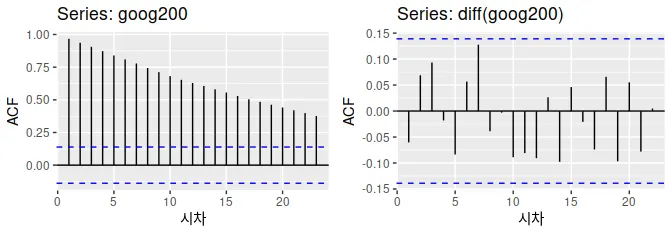
    - 이후: 백색소음과 같은 형태의 데이터로 바뀜, 즉 차분을 통해 완전히 random한 데이터를 뽑아낼 수 있음
    - 데이터에 계절성 패턴이 강하게 나타나면 1차 차분 전에 계절성 차분 먼저 계산

#### 3. 분산 안정화
: 시계열의 변동 폭이 점점 커지거나 작아질 때 적용

1. 로그 변환
: 분산의 정상성을 확보하기 위한 방법
- 로그의 밑을 10으로 사용하면, 로그 눈금에서 1만큼 증가하는 것이 원래의 눈금에서 10배 증가한 것과 대응됨(쉽게 말해 로그를 취하면 변화폭이 줄어듦) -> 비율적인 변화 강조
- 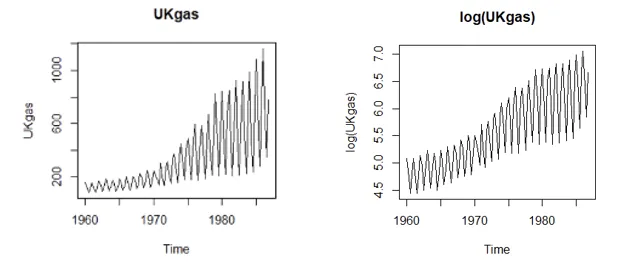
- 로그 변환을 취하자 눈에 띄게 분산이 일정해짐!

2. Box-Cox (박스-콕스 변환)
: 분산의 정상성을 확보하기 위한 방법
- 로그 변환의 일반화된 형태
$$
Y_t^{(\lambda)} =\begin{cases}\frac{Y_t^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\\log(Y_t), & \text{if } \lambda = 0\end{cases}
$$
- Y: 변환할 원본 데이터, $\lambda$(람다) : 변환 파라미터
- 람다는 변환 강도를 조절하는 매개 변수! 이 값에 따라 다양한 변환이 가능하고, 최대 우도 추정법을 통해 가장 적합한 람다를 찾을 수 있다.
- 람다 값을 조정해 데이터 특성에 맞는 최적의 변환 수행이 가능하며, 반응 변수의 정규성 또한 확보할 수 있음
- 로그변환과 마찬가지로 음수나 0이 포함된 데이터는 처리할 수 없음
    - 데이터의 최소값이 양수가 되도록 어떤 값을 더하는 Shift를 주는 식으로 해결하기도 함

> 시계열 분석은 결국 '정상성 확보 -> 패턴 파악 -> 적절한 모델링'의 순환적 과정이다!

#### 정상/비정상 여부 판단
| 시계열 분석의 출발점은 정상 시계열인지 아닌지 판단하는 것
- 단위근 검정 사용 (ADF, KPSS 등)
- 비정상이면 -> 다음 단계로 이동
#### 비정상 유형에 따라 정상성 확보
| 비정상 시계열이라고 해서 무조건 차분하는 건 아님
- 추세가 있다면 -> 차분, 추세 제거
- 계절성이 있다면 -> 계절 차분 or Deseasoning
- 분산 변화가 있다면 -> 로그변환, Box-Cox 변환
- 적절한 방법을 선택해 정상성 확보
#### 정상성 확보 후 어떤 프로세스를 따르는지에 따라 모델링
| 정상성이 확보되면, 시계열의 구조에 맞게 모델을 적용
- OLS, AR, MA, ARIMA, SARIMA 등..  
나머지는 다음 시간에 배운다!

